## A Prime or Not a Prime

*Project 1 for MTH337 by Jacob A. Bolton*

### Introduction

In mathematics, a prime is a positive integer greater than one that has only two positive divisors: itself and 1. In other words, a prime number cannot be formed by multiplying two smaller positive numbers. Mathematically, primes are interesting numbers, and somewhat complicated to deal with. Mathematicians have labored for cenutries to study the exact nature of primes -- where they occur in the number line, and calculating probabilities that a given number at random is prime. Primes have real-life uses in the cryptography world.

In the 17th century, the well-known mathematician Fermat developed an equation that all prime numbers adhered to. Specifically, if $p$ is a prime number, then $a^p \equiv a \pmod p$ for all integers $a$ where $p > a \geq 0$. In more common terms, this means that the remainder of $a^p \pmod p$ is equal to the remainder $a \pmod p$. For every prime number, this equation holds. However, there are a certain class of numbers that also render this equation true but are not primes. These are variously called false primes (but more specifically they are Carmichael numbers). The goal of this project is to investigate the prime factorizations of the first twenty false primes.

### Python Coding

Since we plan on using the above equivalence to determine false primes, we must note that numbers that satisfy the above equivalence will be both false primes and true primes, so we need a way to determine whether or not a number is prime. We will build a function, named `isprime`, that will return True if the given number $n$ is prime, and False if it is not prime. Furthermore, we must build a second function that returns a list of primes less than a given number, which I will call `myprimes`.

In [1]:
def isprime(n):
    isPrime = True                   # Assume that the number is prime until proven otherwise
    if n < 2:                        # We will state that numbers less than two are automatically not prime
        isPrime = False              
    for k in range(2,int(n**0.5)+1):   # Use a range of all integers from 2 to the square root of the number n
        if n%k == 0:                 # See if k divides n
            isPrime = False          # If k divides n, then it is not prime, and break the loop. Otherwise, continue
            break
    return isPrime                   # Return isPrime


The `isprime` function first assumes that the given number is prime. Of course, I could have coded it to assume that it is not a prime, then determine that it is a prime after running the code, but that would seem more complex. Next, we say that any number less than two is not a prime by default since a prime number must be greater than 1. Next, we will have to check if every number less than $n$ divides $n$. This is logically equivalent to checking if $n \mod k == 0$ -- that is, if $n$ is an integer multiple of $k$. To do this, I implement a `for` loop that loops from 2 as a lower bound to the floor of the square root of $n$ plus 1 as an upper bound. Using the loop, the program checks $n \mod k$ for every $k$ in the range. If $n \mod k == 0$ for some k, then the $n$ is not prime, since there is a number that divides it, and exit the loop. Otherwise, continue the loop. If the loop completes without a single number dividing $n$, then it is a true prime.

Some examples of the `isprime` function and it's return values are demonstrated here:

In [2]:
#### Examples of isprime ####
print(f'Is 24 prime? {isprime(24)}') # should return False
print(f'Is 7 prime? {isprime(7)}')   # should return True
print(f'Is 561 prime? {isprime(561)}') # should return False

Is 24 prime? False
Is 7 prime? True
Is 561 prime? False


Next, develop a function that returns a list of prime numbers less than or equal to some number $n$.

In [3]:
def myprimes(n):
    primes = [] 			    # Empty list of prime numbers
    for num in range(2,n+1):    # Any integer < 2 is not prime, 2 is prime.
        if isprime(num):        # Use the previous function to determine if num is prime
            primes.append(num)  # if it is prime, append to list of primes
    return primes               # return list of primes

`myprimes` uses `isprime` to check the primality of every integer less than or equal to $n$, essentially.  If a certain number `num` is prime, add it to the list `primes`, and return this list at the end of the function call.

Some demonstrations of the return values of `myprimes`:

In [4]:
### Examples of myprimes ###
print(f'Primes less than or equal to 32: {myprimes(32)}')
print(f'Primes less than or equal to 10: {myprimes(10)}')
print(f'Primes less than or equal to 2: {myprimes(2)}')

Primes less than or equal to 32: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
Primes less than or equal to 10: [2, 3, 5, 7]
Primes less than or equal to 2: [2]


Now that we have a function to determine the primality of a given number, and a function that returns primes less than a given number, the second part of the project deals with breaking down these false primes, displaying the prime-factorization of the false primes. This allows us to get a closer look at how the false primes are composed, and perhaps we can notice some patterns between them and some interesting features of the false primes. The `primary` breaks down a given number $n$ into a list that contains all of it's prime factors, listed from smallest to largest.

In [5]:
def primary(n):
    possiblePrimes = myprimes(n)   # Only primes less than or equal to n can be possible prime factors
    factors = []                   # Create an empty list of these factors
    for p in possiblePrimes:       # Loop over every possible prime factor
        while n%p == 0:            # We check to see if p divides n, and how many times
            factors.append(p)      # if p divides n, add p to the list of prime factors
            n = n//p               # divide the prime factor out of n so that we do not repeat factors
        if n == 1:                 # No need to check additional prime divisors when all have been found
            break
            
    return factors                 # return the factors found

The `primary` function begins by listing all the possible prime numbers that could be in the prime-factorization of `n` using the `myprimes` function, since the only primes that can be in the prime-factorization of `n` are less than or equal to `n` itself. Additionally, at the beginning of the function call, an empty list named `factors` is initialized. The function then uses a `for` loop over every possible prime, and then a nested `while` loop checks to see if that prime `p` divides `n` evenly. If it does, add `p` to the list, divide `n` by `p`, and continue. The function will loop over a single prime and continue to divide `n` by `p` until `p` no longer divides `n`, where it then switches to trying a new prime. This ensures that every prime is included with the right multiplicity.

In [6]:
### Examples of primary() function ###
print(primary(23))
print(primary(12))
print(primary(60))

[23]
[2, 2, 3]
[2, 2, 3, 5]


With all this, we can now develop a function that will return a list of numbers that satisfy $a^p \equiv a \pmod p$ (with the restrictions on `a` listed in the introduction). I'll call this function `isprimelike`, which will return True if a given number `n` satisfies the mentioned congruence relation, and False if `n` does not satisfy the congruence relation. Remember, this function will return every prime and some false primes.

In [7]:
def isprimelike(n):
    primelike = True              # Assume the number is prime like
    for a in range(n):            # We need a range of numbers from 0 to n-1, per the rules of the congruence
        if pow(a, n, n) != a % n: # If a^n mod n != a mod n (think of n as being p), then the number is not prime-like,
            primelike = False     # since the congruence relation has to hold for all a in the range.
            break
    return primelike              # Return primelike

`isprimelike` is reasonably similar to `isprime`, except this time instead of checking divisors, it checks the specific congruence relation mentioned above. It first assumes that the given number `n` is a prime-like number (the congruence relation holds). Next, it checks to see if the congruence relation holds for every integer `a` between 1 and `n-1`. This function uses the `pow` function for performance, but it is mathematically the same to the congruence relation. If there is a case where $a^p \equiv a \pmod p$ does NOT hold true, then it is not a prime-like number.

In [8]:
### Examples of isprimelike() ###
print(isprimelike(561))
print(isprimelike(13))
print(isprimelike(22))

True
True
False


Now, for the main body of the project.  We need a function that returns the first twenty false primes, and false primes only. What we can do is develop a script that iterates over integers, checks if they are prime-like, and then if they are prime-like, check if they are prime. This acts as a filter (or sieve), and should only return false primes. The trick is that we need to iterate over this loop until we a specific number of false primes, and we don't know how many numbers we need to iterate through in order to find the  `n`th false prime. The function `falseprimes` will iterate over every from 2 onwards, check if that number is prime-like, and then if that number is a prime. `falseprimes` takes a single argument `f` that is the number of false primes the function will return. Any number that is prime-like and also NOT a prime wil be added to the list called `falsePrimesList`. Once the first `f` false primes have been listed, the loop will exit.

In [9]:
def falseprimes(f):
    found = 0                      # At the beginning, no false primes have been found
    num = 2                        # We'll look for false primes at 2 even though we know that 561 is the 1st false prime
    falsePrimesList = []           # Initialize an empty list of false primes
    
    while found < f:               # While we have not found a sufficient number of primes (f is the number we want to find)
        if not isprime(num) and isprimelike(num):       # If the number is not prime and prime-like
            falsePrimesList.append(num) # Append to false primes
            found += 1             # Add 1 to the number of false primes
        num += 1                   # Check next number

    return falsePrimesList         # Return list of first f false primes
  

The `falseprimes` is not exactly the most efficient solution to the problem, but it works reasonably well. Essentially, it just checks every integer from 2 upwards until it finds `f` false primes. First, it checks if a given integer is prime-like. If it is, check if it is prime. If not, then it's still considered a prime (even if it's a composite in reality), and it is not added to `falsePrimesList`. In other words, a given integer has to be prime-like and not prime to be added to `falsePrimesList`. Every time a false prime is discovered, the `found` variable is iterated by 1. Every single iteration of the loop, the `num` variable is iterated by 1. This continues until `found < f` is no longer true; that is, until the function has found the first `f` false primes.

In [10]:
def decompose(fpList):
    primeFactors = []
    for pseudoprime in fpList:                           # Iterate over list of false 
        factorization = primary(pseudoprime)             # calculate primary factorization
        primeFactors.append(factorization)               # append factors as a list to list of all prime factors         
        print(f'{pseudoprime} : {primary(pseudoprime)}')   # Print false prime
    return primeFactors
   

Finally, in order to investigate the prime-factorizations of false primes (which are very intriguing), the `decompose` function iterates over a provided list of false primes (provided by `falseprimes`) and prints the prime-factorization of each one, using the `primary` function that was already implemented. Since it is fairly CPU-intensive to find so many false primes and print the primary factorizations of them, the first 20 will be printed.

In [11]:
decompose(falseprimes(20))

561 : [3, 11, 17]
1105 : [5, 13, 17]
1729 : [7, 13, 19]
2465 : [5, 17, 29]
2821 : [7, 13, 31]
6601 : [7, 23, 41]
8911 : [7, 19, 67]
10585 : [5, 29, 73]
15841 : [7, 31, 73]
29341 : [13, 37, 61]
41041 : [7, 11, 13, 41]
46657 : [13, 37, 97]
52633 : [7, 73, 103]
62745 : [3, 5, 47, 89]
63973 : [7, 13, 19, 37]
75361 : [11, 13, 17, 31]
101101 : [7, 11, 13, 101]
115921 : [13, 37, 241]
126217 : [7, 13, 19, 73]
162401 : [17, 41, 233]


[[3, 11, 17],
 [5, 13, 17],
 [7, 13, 19],
 [5, 17, 29],
 [7, 13, 31],
 [7, 23, 41],
 [7, 19, 67],
 [5, 29, 73],
 [7, 31, 73],
 [13, 37, 61],
 [7, 11, 13, 41],
 [13, 37, 97],
 [7, 73, 103],
 [3, 5, 47, 89],
 [7, 13, 19, 37],
 [11, 13, 17, 31],
 [7, 11, 13, 101],
 [13, 37, 241],
 [7, 13, 19, 73],
 [17, 41, 233]]

### Conclusion
A quick analysis of the first twenty false primes appears to confirm the idea that false primes are somewhat unpredictable, in the sense that there is not a very clear pattern for where false primes will appear. Using the `pyplot` library to print a graph showing the location of those false primes may help in analysis. (each dot is a false prime)

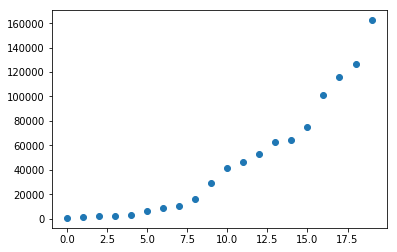

In [13]:
import matplotlib.pyplot as plt
plt.plot(falseprimes(20), 'o')
plt.show()

With the table fully printed, one can begin to analyze and investigate the nature of these false primes. It is interesting to note that no false primes on the list have fewer than three prime factors. Furthermore, the smallest prime factor in every factorization is at least 3 -- 2 doesn't appear in any factorization. This would seem to imply that no false prime is even. No false prime on the list has only two prime factors, in fact most have at least three if not four prime factors. Furthermore, no false prime has repeat prime factors -- in other words, each false prime is "square-free". The actual shape of the plot seems *looks* like some sort of exponential function, but on such a small scale it is difficult to determine this exactly. In conclusion, *based off the data generated in this project*, no false primes are even, all are square-free, but their exact nature is difficult to determine.